# 지도그래프

In [1]:
import urllib, json
import folium
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

In [2]:
#지도그래프를 위한 서울시 행정구역 json file.
url = 'https://raw.github.com/PinkWink/DataScience/master/data/02.%20skorea_municipalities_geo_simple.json'
with urllib.request.urlopen(url) as fp:
    gu_geojson = json.loads(fp.read())

In [3]:
def plot_gu_map(df, value_col, geojson=gu_geojson, legend_name=None, map_title=None):
    if legend_name is None:
        legend_name = value_col

    if map_title is None:
        map_title = f'Seoul Choropleth Map of {value_col}' if legend_name is None \
    else f'Seoul Choropleth Map of {legend_name}'

    # 지도 경계 json 파일에 자치구별 value 정보 추가
    for idx, gu_dict in enumerate(geojson['features']):
        gu_nm = gu_dict['id']
        value = df.loc[df.자치구명==gu_nm, value_col].iloc[0]
        txt = f'{gu_nm}<br>{value:.3f}'
        geojson['features'][idx]['properties']['tooltip1'] = txt


    print(f'\n\n>>> 서울시 자치구별 단계구분도 (기준 : {value_col})')

    m = folium.Map(location=[37.562225, 126.978555], zoom_start=11, tiles='Stamen Toner')
    choropleth = folium.Choropleth(
      geo_data = geojson,
      data = df,
      columns = ['자치구명', value_col],
      fill_color = 'Oranges',
      key_on = 'feature.id',
      fill_opacity=0.9,
      line_opacity=1,
      legend_name=legend_name
    ).add_to(m)
    choropleth.geojson.add_child( folium.features.GeoJsonTooltip(['tooltip1'], labels=False))

    title_html = f'<h3 align="center" style="font-size:20px"><b>{map_title}</b></h3>'
    m.get_root().html.add_child(folium.Element(title_html))
    folium.LayerControl().add_to(m)

    return m

# line chart

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(14,5))

ax[0].plot()
ax[0].set_title("", fontsize=15)
ax[0].set_xticks([])
ax[1].plot()
ax[1].set_title("", fontsize=15)   
ax[1].set_xticks([])
plt.tight_layout()

#  using sns

In [ ]:
plt.figure(figsize=(11,4))
sns.lineplot(x='주', y='이동평균_sc', color=pal[1], data=delivery_1, linewidth=3, marker='o', label='배달건수')
sns.lineplot(x='주', y='이동평균_sc', color=pal[2], data=fpopl_1, linewidth=3, marker='o', label='유동인구')
plt.xticks(list(range(4,25))); plt.legend(); plt.xlabel('이동평균 주',fontsize=14)
plt.axvspan(10.5, 11.5, facecolor=pal[3], alpha=0.4)
plt.title('배달건수와 유동인구 주 평균 추이',fontsize=16)
plt.tight_layout()

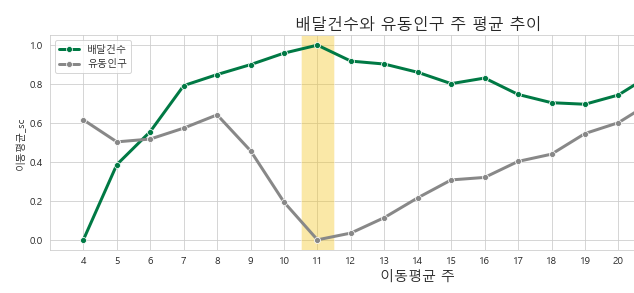

# 이동평균

In [ ]:
card[''] = card.groupby('').rolling(window=3, min_periods=1).mean().reset_index()['']
card[''] = card.groupby('').rolling(window=3, min_periods=1).mean().reset_index()['']

## 선형회귀 플랏

In [ ]:
color_dict = dict({'':pal[3], '':pal[1], '': pal[2]})
sns.lmplot(x='', y='', data=recover1,aspect=1.2, height=5, order=1, hue='hue', palette=color_dict)
plt.title('', fontsize=16)

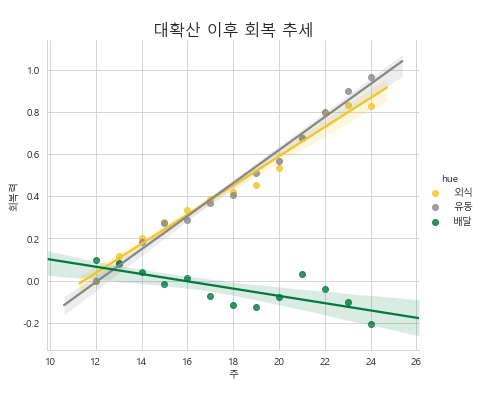

# 파이차트 및 바차트 그래프 

In [ ]:
#subplot 설정하기
from matplotlib.gridspec import GridSpec
fig = plt.figure(figsize=(12, 8)) 
gs = GridSpec(3, 4, figure=fig)
ax1 = fig.add_subplot(gs[:2, :2]) 
ax2 = fig.add_subplot(gs[:2, 2:]) 
ax3 = fig.add_subplot(gs[2:, :])

percent = [10,25] # 5%와 25%의 배달 비중 볼 것.
delivery_2['배'] = ['(나머지)']*delivery_2.shape[0]

#파이차트 그리는 부분
for num,p in enumerate(percent):
    ax = ax1 if num==0 else ax2
    i = round(delivery_2['DLVR_STORE_ID'].nunique()*p/100)
    store = delivery_2['DLVR_STORE_ID'].value_counts().head(i).index
    ind = delivery_2[delivery_2['DLVR_STORE_ID'].isin(store)].index
    delivery_2.loc[ind,'배달 시장 비중'] = delivery_2.loc[ind,'배달 시장 비중'].apply(lambda x: '(상위 '+str(p)+'%)')
    delivery_2['배달 시장 비중'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',shadow=True, startangle=80,
                                             labels=delivery_2['배달 시장 비중'].value_counts().index, colors=[pal[0], pal[4]],
                                             textprops={'weight':'bold', 'fontsize':12},labeldistance=0.5, pctdistance=0.3, ax=ax)
    ax.axis('off')
    ax.set_title('상위'+str(p)+'%의 배달건수 차지 비율', fontsize=13, position=(0.5, 0.95))

x = list(range(1,25))    
ax3.bar(x, percent_top5, color=pal[2])
ax3.set_ylim(30,38); ax3.set_xticks(x)
ax3.axhline(34, color=pal[0], linewidth=2.5)
ax3.set_title('상위5% 배달상점의 주별 배달건수 차지 비율', fontsize=14)
ax3.set_ylabel('%'); ax3.set_xlabel('이동평균 주')
fig.suptitle('2020년 1월 1일 부터 6월 21일까지 서울특별시 배달상점들의 배달건수 점유율', weight='bold', fontsize=11, position=(.5, 0.09))
plt.subplots_adjust(top = 0.96, wspace=0.05, bottom=0.2)

# line plot and box plot 합체

In [ ]:
plt.figure(figsize=(10,4))
plt.bar(x = range(0,10), height=pca.explained_variance_/sum(pca.explained_variance_), label='', color=pal[2], alpha=0.9)
sns.lineplot(x=range(0,10), y=abs(temp.corr()[''].drop('', axis=0)).values, marker='o', color=pal[0], linewidth=5, 
             label='')
plt.legend(fontsize=12)
plt.tight_layout()